In [1]:
# python用のパッケージ
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from graphviz import Digraph

G = Digraph(format="png")
G.attr("node", shape="square", style="filled")
G.edge("start","state1",label="0.8")
G.edge("start","state2",label="0.2")
G.edge("state1","state1",label="0.5")
G.edge("state2","state2", label="0.8")
G.edge("state1","state2",label="0.5")
G.edge("state2","end",label="0.2")
G.edge("end","count",label="1.0")
G.edge("count","start",label="1.0")
G.node("start", shape="circle", color="pink")
G.render("images/graphs")

'images/graphs.png'

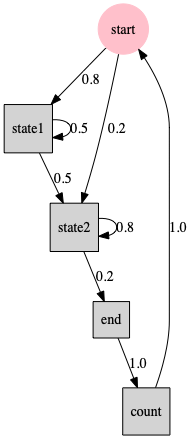

In [3]:
Image("images/graphs.png")

In [4]:
print(G)

digraph {
	node [shape=square style=filled]
	start -> state1 [label=0.8]
	start -> state2 [label=0.2]
	state1 -> state1 [label=0.5]
	state2 -> state2 [label=0.8]
	state1 -> state2 [label=0.5]
	state2 -> end [label=0.2]
	end -> count [label=1.0]
	count -> start [label=1.0]
	start [color=pink shape=circle]
}


ファイルに出力する場合には、pprintを使って以下のように出力する

In [5]:
from pprint import pprint
with open("hoge.txt", "w") as f:
    pprint(G, stream=f)

## dot2texを使ってみる

ex_1.dotの以下の部分は、dot2tex用の書式情報

```latex
    d2ttikzedgelabels = true;
    d2tstyleonly = true;
    d2tdocpreamble = "\usetikzlibrary{automata}";
    d2tfigpreamble = "\tikzstyle{every state}= \
    [draw=blue!50,very thick,fill=blue!20]";
    node [style="state"];
    edge [lblstyle="auto",topath="bend left"];
```

In [6]:
%%writefile models/ex_1.dot
digraph yuukou { // directed graph
    d2ttikzedgelabels = true;
    d2tstyleonly = true;
    d2tdocpreamble = "\usetikzlibrary{automata}";
    d2tfigpreamble = "\tikzstyle{every state}= \
    [draw=blue!50,very thick,fill=blue!20]";
    node [style="state"];
    edge [lblstyle="auto",topath="bend left"];
    a -> b [texlbl="$1^2$"];
}

Overwriting models/ex_1.dot


dotコマンドでpngを出力してみる

In [7]:
%%bash
dot -Tpng -Gdpi=200 models/ex_1.dot > images/ex_1.png

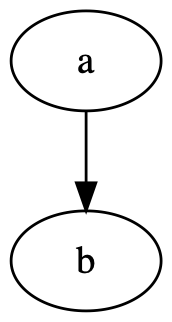

In [8]:
Image("images/ex_1.png")

### dot2texで出力
dot2texで出力すると、texlblに記述した式が表示される。

sageには、デフォルトでlatex環境が揃っているので、インストールはpipコマンドでdot2texをインストールするだけです。

```bash
$ pip install dot2tex
```

In [252]:
%%bash
dot2tex -tmath models/ex_1.dot > models/ex_1.tex
latex models/ex_1.tex
dvips ex_1.dvi
ps2epsi ex_1.ps
convert ex_1.epsi images/ex_1.png
rm *.dvi *.tex *.ps *.epsi *.log *.aux

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(./models/ex_1.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 2 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/dvips.def)
(/usr/share/texmf/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texmf/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texmf/tex/lat

This is dvips(k) 5.993 Copyright 2013 Radical Eye Software (www.radicaleye.com)
' TeX output 2018.07.15:0540' -> ex_1.ps
</usr/share/texlive/texmf-dist/dvips/base/tex.pro>
</usr/share/texlive/texmf-dist/dvips/base/texps.pro>
</usr/share/texlive/texmf-dist/dvips/base/special.pro>
</usr/share/texlive/texmf-dist/dvips/base/color.pro>. 
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb>
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr7.pfb>
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb>[1] 
rm: cannot remove '*.tex': No such file or directory


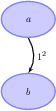

In [253]:
Image("images/ex_1.png")

In [254]:
%%writefile models/ex_2.dot
digraph yuukou { // directed graph
    node [style="state"];
    edge [lblstyle="auto",topath="bend left"];
    a -> b [texlbl="$1^2$"];
}

Overwriting models/ex_2.dot


### オプションの指定
dotファイルに書式に関する設定を入れる代わりに、オプションを使って同じ出力になるように設定してみます。

In [1]:
%%bash
dot2tex -tmath --tikzedgelabels --docpreamble '\usetikzlibrary{automata}' \
    --figpreamble '\tikzstyle{every state}= [draw=blue!50,very thick,fill=blue!20]' \
    models/ex_2.dot > models/ex_2.tex
latex models/ex_2.tex
dvips ex_2.dvi
ps2epsi ex_2.ps
convert ex_2.epsi images/ex_2.png
rm *.dvi *.tex *.ps *.epsi *.log *.aux

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(./models/ex_2.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 2 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texmf/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/latexconfig/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/dvips.def)
(/usr/share/texmf/tex/latex/xcolor/x11nam.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texmf/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texmf/tex/lat

This is dvips(k) 5.993 Copyright 2013 Radical Eye Software (www.radicaleye.com)
' TeX output 2018.07.16:0348' -> ex_2.ps
</usr/share/texlive/texmf-dist/dvips/base/tex.pro>
</usr/share/texlive/texmf-dist/dvips/base/texps.pro>
</usr/share/texlive/texmf-dist/dvips/base/special.pro>
</usr/share/texlive/texmf-dist/dvips/base/color.pro>. 
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmmi10.pfb>
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr7.pfb>
</usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb>[1] 
rm: cannot remove '*.tex': No such file or directory


In [3]:
Image("images/ex_2.png")

NameError: name 'Image' is not defined

In [257]:
import dot2tex

In [261]:
testgraph = """
digraph G {
    a -> b -> c -> a;
}
"""
texcode = dot2tex.dot2tex(testgraph, format='positions')
texcode

{'a': [54, 162], 'b': [27, 90], 'c': [54, 18]}

## ブロック線図
残念ながら、うまく描けませんでした。

In [10]:
%%writefile "test.dot"
digraph {
    // 書式を設定
    graph [charset="UTF-8"]
    node [shape="box"]
    
    // ノードの設定
    // 入出力用の見えないノード
    start [label="", shape=none]
    end [label="", shape=none]
    // 信号の結合されるジャンクション
    J_r [label="", shape=circle, height = 0.2]
    J_d [shape=point]

    // エッジの設定
    start -> J_r 
    J_r -> P_1 [label="X"] ;
    P_1->  J_d;
    J_d -> end [label="Y"];
    J_d -> P_2
    P_2 -> J_r [headlabel="+"]
  
    { rank=same; start, end, J_r, P_1, J_d }

}

Writing test.dot


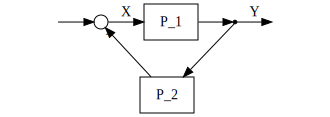

In [11]:
from graphviz import Source
Source.from_file('test.dot')